<a href="https://colab.research.google.com/github/JANG-hyeonjun/biomedical_deeplearning/blob/main/lab02_201602955_%EC%9E%A5%ED%98%84%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.2linear-regression-scratch

## 3.2.1generating the Dataset

In [1]:
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==0.16.2

Requirement already up-to-date: mxnet-cu101==1.7.0 in /usr/local/lib/python3.7/dist-packages (1.7.0)


In [2]:
%matplotlib inline 
import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w,b,num_examples):
    X = torch.normal(0,1,(num_examples,len(w)))
    print(w.shape)
    print(X.shape)
    y = torch.matmul(X,w) + b
    print(len(y))
    print(y.shape)
    y += torch.normal(0,0.01,y.shape)
    print(y.shape)
    print('\n')
    print(len(y))
    return X,y.reshape((-1,1))


In [4]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)
# 기본적으로 height witdth chanel
# torch batchszie chanel height width

torch.Size([2])
torch.Size([1000, 2])
1000
torch.Size([1000])
torch.Size([1000])


1000


2 by 1 w 와 4.2 bias를 만들고 synthetic_data를 이용해 features와 label을 만든다. 결과적으로 features 는 1000  by 2가 만들어지고 labels는 1000 by 1이 만들어진다. 

In [5]:
print(features.shape)
print(labels.shape)
print(len(features))

torch.Size([1000, 2])
torch.Size([1000, 1])
1000


In [6]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([-1.3726,  0.1605]) 
label: tensor([0.9069])


In [7]:
print(features)

tensor([[-1.3726,  0.1605],
        [ 0.6630,  0.5712],
        [ 0.6035,  0.3791],
        ...,
        [ 0.9742,  0.4416],
        [ 0.8268,  0.6319],
        [ 0.1455, -1.5839]])


In [8]:
print(features[:,(0)])

tensor([-1.3726e+00,  6.6299e-01,  6.0347e-01,  8.4674e-01,  2.7023e+00,
         5.4014e-01, -1.2733e+00, -3.0881e-01, -1.2791e+00, -9.4214e-01,
        -1.0718e+00, -5.5763e-02, -3.9643e-01, -1.6708e-01, -9.4207e-01,
        -5.9588e-01,  2.5017e+00, -5.5169e-01,  1.3646e+00, -4.0867e-02,
         5.3144e-01,  3.6711e-01, -6.2111e-02,  1.1354e+00,  1.5802e-01,
         4.1798e-01, -1.3507e+00, -1.2107e+00,  1.7611e+00,  1.3025e+00,
        -1.1209e+00, -1.8538e-01, -1.6611e+00,  7.0329e-01, -3.4286e-01,
         3.9526e-01, -6.9979e-01, -4.7149e-01, -6.8082e-01, -1.1465e+00,
         3.1467e-01, -8.6440e-02, -1.4113e+00, -2.4333e+00, -1.2037e+00,
        -1.2464e+00, -2.0150e+00, -7.1654e-01, -1.4683e+00, -3.1578e-01,
        -1.0622e-01, -1.7582e-01,  4.6255e-01, -9.3376e-01,  3.0786e-01,
        -2.1442e-01, -4.4115e-01,  6.6281e-01, -4.2271e-01, -1.3513e+00,
         6.3158e-01,  1.3578e+00,  9.2499e-02,  7.8625e-01,  8.7590e-01,
        -2.6198e-01, -1.8611e+00, -5.6645e-01, -9.9

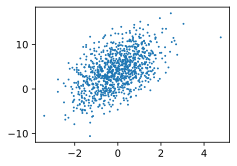

In [9]:
d2l.set_figsize()

d2l.plt.scatter(features[:,(0)].detach().numpy(),
                labels.detach().numpy(),1);

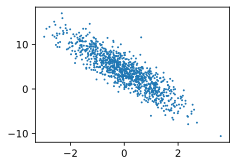

In [10]:
d2l.set_figsize()

d2l.plt.scatter(features[:,(1)].detach().numpy(),
                labels.detach().numpy(),1);

다음은 features와 label은 선형 관계를 나타내는것을 확인 할 수 있습니다. features[:(1)] 은 음의 상관관계를 가지고  features[:(0)] 은 양의 상관 간계를 가지느것을 확인 할 수 있다. 

## 3.2 Reading the Dataset

In [11]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    #print(indices)
    random.shuffle(indices)
    #print(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size,num_examples)])
        #print(len(batch_indices))
        yield features[batch_indices],labels[batch_indices]

num_example은 1000개의 숫자가 들어있고 리스트로 0~999 넘버링을한 주사위를 만들고  그것을 shuffle로 섞은 뒤 배치사이즈만큼 랜덤 추출을 만든 뒤 배치사이즈만큼 features와 label을 산출하는식으로 코딩을 진행했다. 

In [12]:
batch_size = 10

for X,y in data_iter(batch_size, features,labels):
    print(X,'\n',y)
    break

tensor([[-0.3429,  0.7882],
        [-0.4512,  1.2273],
        [ 0.3193, -0.5103],
        [ 0.7893,  0.2967],
        [-0.6404,  1.2925],
        [ 1.0910,  1.6228],
        [-0.0409,  0.5653],
        [ 0.4077,  0.6343],
        [ 0.9511, -0.2319],
        [ 0.8759,  0.3550]]) 
 tensor([[ 0.8447],
        [-0.8784],
        [ 6.5664],
        [ 4.7777],
        [-1.4585],
        [ 0.8734],
        [ 2.1874],
        [ 2.8514],
        [ 6.9023],
        [ 4.7257]])


다음 결과는 batch_size 10개의 features와 labels를 출력한것을 확인 할 수 있습니다.  

## 3.2.3 initializing Model Parameters

In [13]:
w = torch.normal(0,0.01,size=(2,1), requires_grad = True)
b = torch.zeros(1,requires_grad=True)

In [14]:
print(w,b)

tensor([[-0.0174],
        [-0.0027]], requires_grad=True) tensor([0.], requires_grad=True)


model Parameters를 초기화하는 부분임을 알 수 있다.
X.shape 즉  batchsize 만큼 산출한 feature임을 확인 할 수 있다. 이와 행렬적인 연산이 가능해야하므로 w 를 2 by 1  으로 초기화한것을 알 수 있고 bias는 0으로 초기화 한것을 알 수 있다.

## 3.2.4 Defining the Model

In [15]:
print(X.shape)
print(w.shape)
print(y.shape)

torch.Size([10, 2])
torch.Size([2, 1])
torch.Size([10, 1])


In [16]:
def lineareg(X,w,b):
    return torch.matmul(X,w) + b

linear regression 함수를 python으로 바꾼것이며 
결국 이함수가 모델임을 알 수있고 우리는 이 모델의 w 와 b를 찾아야 함을 알 수 있다.

## 3.2.5 Defining the Loss Function

In [17]:
def squared_loss(y_hat,y):
    #print(y_hat.shape)
    #print(y.shape)
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

MSE Loss function 을 구현해 놓은것을 확인 할 수 있다.

## 3.2.6 Defining the Optimization Algorithm

In [18]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            #print('!')
            #print(param)
            param -= lr * param.grad / batch_size
            print(param.grad)
            #print('!!!!!!!')
            param.grad.zero_() #trainer.zero_grad
            #print(param)

stochastic gradient descent 실제로 구현한부분이라 할 수 있으며 param이 실제로 찍어보면 true_w , true_b 에 가까워 짐을 알 수 있다. 

## 3.2.7 Training

In [19]:
lr = 0.03
num_epochs = 3
net = lineareg
loss = squared_loss

직접 hyper parameter을 정하는 부분임을 알 수 있다. 

In [20]:
print(features.shape)

torch.Size([1000, 2])


In [21]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward() #. loss.backward() 편미분이 여기서 완료
        #print(w.grad) 
        #print(b.grad) #그럼 기울기를 구할 수 있다. w,b에 대해 
        sgd([w,b],lr,batch_size) # .step 구해진 w,b를 이용해 구해진 기울기 바탕으로 여기서 w,b를 업데이트 한다. 
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch + 1},loss{float(train_l.mean()):f}') 


tensor([[-50.1706],
        [ 55.5734]])
tensor([-67.4727])
tensor([[-9.0275],
        [20.3764]])
tensor([-36.6811])
tensor([[-4.6815],
        [64.0026]])
tensor([-54.7722])
tensor([[-5.0439],
        [16.4486]])
tensor([-39.8510])
tensor([[-39.8827],
        [ 35.1632]])
tensor([-41.7491])
tensor([[-13.7079],
        [ 12.1902]])
tensor([-23.9742])
tensor([[-33.8950],
        [ 31.8404]])
tensor([-25.0536])
tensor([[-9.2578],
        [30.8281]])
tensor([-43.0550])
tensor([[-50.2605],
        [ 29.6742]])
tensor([-39.1018])
tensor([[-19.7837],
        [ 27.8481]])
tensor([-45.1748])
tensor([[-21.3760],
        [ 35.0816]])
tensor([-37.4505])
tensor([[-4.9320],
        [26.9558]])
tensor([-35.6523])
tensor([[-16.2931],
        [ 50.9247]])
tensor([-22.5393])
tensor([[12.7912],
        [22.6498]])
tensor([-23.9758])
tensor([[-22.2549],
        [ 22.7108]])
tensor([-37.6279])
tensor([[-10.3567],
        [ 16.7053]])
tensor([-19.5761])
tensor([[-10.8767],
        [ 10.3019]])
tensor([-22

In [22]:

print(true_w,true_b)
print(w)
print(b)

tensor([ 2.0000, -3.4000]) 4.2
tensor([[ 1.9987],
        [-3.4001]], requires_grad=True)
tensor([4.1992], requires_grad=True)


In [23]:
print(f'error in estimating w: {true_w-w.reshape(true_w.shape)}')
print(f'error in estimating b:{true_b - b}')

error in estimating w: tensor([1.3154e-03, 5.2452e-05], grad_fn=<SubBackward0>)
error in estimating b:tensor([0.0008], grad_fn=<RsubBackward1>)


실제로 epoch가 진행 할 수록 loss값이 줄어든것을 확인 할 수있으며 편미분의 backward를 sum을 통해하는 이유는 scalar값이기 때문입니다. 결국 아무리 많은 변수가 있어도 그변수를 제외하고 나머지는 0의 값을 가지므로 sum 한후 편미분을 진행해도 아무문제가 없기 때문입니다. 그럼 sgd 조절되어야하는 w,b가 매개변수로 들어갈것이고 이미 backward에의해 기울기를 알 수 있으며 param.grad를 이용해 경사하강법을 진행하게 됩니다. 실제로 param을찍어보면 값이 계속 true_w와 true_b에 가까워지는 것을 알 수있으며 
이는 train이 잘되고 있음을 알 수 있습니다.

# 3.3Concise Implementation of Linear Regression

## 3.3.1 Generating the Dataset

In [24]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = d2l.synthetic_data(true_w,true_b,1000)
print(features.shape)
print(labels.shape)

torch.Size([1000, 2])
torch.Size([1000, 1])


위의 3.2 과정에서 synthetic_data를 직접 구현했지만 
d2l의 모듈을 사용해 만든것을 확인 할 수 있다.

## 3.3.2 Reading the Dataset

In [25]:
def load_array(data_arrays,batch_size,is_train = True): #@save
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size = 10
data_iter = load_array((features,labels),batch_size)

In [26]:
next(iter(data_iter))

[tensor([[-0.8366, -0.8587],
         [ 0.3090, -0.2521],
         [ 1.3764, -0.2413],
         [ 0.7262, -1.7107],
         [-0.8508,  0.1230],
         [-0.2965, -0.9590],
         [-0.4867, -0.7246],
         [-0.0362, -0.4798],
         [-0.2546, -0.5012],
         [-0.8365,  0.8089]]), tensor([[ 5.4527],
         [ 5.6660],
         [ 7.7762],
         [11.4719],
         [ 2.0901],
         [ 6.8662],
         [ 5.6801],
         [ 5.7720],
         [ 5.3922],
         [-0.2212]])]

##3.3.3 Defining the Model

In [27]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [28]:
print(net)
print(net[0].weight.data)
print(net[0].bias.data)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)
tensor([[-0.6928,  0.4992]])
tensor([-0.5473])


## 3.3.4 Initializing Model Parameters

In [29]:
print(net[0].weight.data.normal_(0,0.01))
net[0].bias.data.fill_(0)

tensor([[0.0111, 0.0008]])


tensor([0.])

## 3.3.5 Defining the Loss Function

In [30]:
loss = nn.MSELoss()

## 3.3.6 Defining the Optimization Alogrithm

In [31]:
print(net.parameters)

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)>


In [32]:
trainer = torch.optim.SGD(net.parameters(),lr=0.03)

## 3.3.7  Training

In [33]:
num_epochs = 7
for epoch in range(num_epochs):
    for X,y in data_iter:
        l = loss(net(X),y)
        print(l)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features),labels)
    print(f'epoch{epoch + 1},loss{l:f}')

tensor(38.6158, grad_fn=<MseLossBackward>)
tensor(32.6379, grad_fn=<MseLossBackward>)
tensor(13.6129, grad_fn=<MseLossBackward>)
tensor(24.5741, grad_fn=<MseLossBackward>)
tensor(35.9326, grad_fn=<MseLossBackward>)
tensor(9.9617, grad_fn=<MseLossBackward>)
tensor(8.4773, grad_fn=<MseLossBackward>)
tensor(8.8669, grad_fn=<MseLossBackward>)
tensor(12.2965, grad_fn=<MseLossBackward>)
tensor(5.5610, grad_fn=<MseLossBackward>)
tensor(12.0220, grad_fn=<MseLossBackward>)
tensor(9.1215, grad_fn=<MseLossBackward>)
tensor(6.5858, grad_fn=<MseLossBackward>)
tensor(8.9973, grad_fn=<MseLossBackward>)
tensor(11.1883, grad_fn=<MseLossBackward>)
tensor(8.1099, grad_fn=<MseLossBackward>)
tensor(1.5024, grad_fn=<MseLossBackward>)
tensor(5.8757, grad_fn=<MseLossBackward>)
tensor(5.6456, grad_fn=<MseLossBackward>)
tensor(4.3405, grad_fn=<MseLossBackward>)
tensor(2.0093, grad_fn=<MseLossBackward>)
tensor(1.8926, grad_fn=<MseLossBackward>)
tensor(2.1273, grad_fn=<MseLossBackward>)
tensor(1.0640, grad_fn=<Ms

In [34]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:',true_b-b)

error in estimating w: tensor([0.0007, 0.0007])
error in estimating b: tensor([-0.0010])


# 3.6 Implementation of Softmax Regression from scratch

In [35]:
import torch 
from IPython import display
from d2l import torch as d2l

In [36]:
batch_size = 256
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [37]:
#print(type(train_iter))
#print(test_iter)

## 3.6.1 Initializing Model Parameters

In [38]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0,0.01,size=(num_inputs,num_outputs), requires_grad = True)
b = torch.zeros(num_outputs,requires_grad=True)

## 3.6.2 Defining the Softmax Operation

In [39]:
X = torch.tensor([[1.0,2.0,3.0],[4.0,5.0,6.0]])
X.sum(0,keepdim=True) 
X.sum(1,keepdim=True)

tensor([[ 6.],
        [15.]])

In [40]:
def softmax(X):
    #print(X.shape)
    X_exp = torch.exp(X)
    #print(X_exp)
    partition = X_exp.sum(1,keepdim=True)
    return X_exp / partition

In [41]:
X = torch.normal(0,1,(2,5))
X_prob = softmax(X)
print(X_prob.shape)
print(X_prob.sum(1).shape) # 2 by 1
X_prob,X_prob.sum(dim = 1)


torch.Size([2, 5])
torch.Size([2])


(tensor([[0.0176, 0.0596, 0.7670, 0.1025, 0.0533],
         [0.0528, 0.1210, 0.6054, 0.1076, 0.1133]]), tensor([1., 1.]))

## 3.6.3 Definging the Model

In [42]:
print(W.shape[0])
print(X)

784
tensor([[-1.7976, -0.5799,  1.9748, -0.0375, -0.6924],
        [-1.5257, -0.6957,  0.9146, -0.8125, -0.7614]])


In [43]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1,W.shape[0])),W)+ b)

## 3.6.4 Defining the Loss Function

In [44]:
y = torch.tensor([0,2])
y_hat = torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]])
#print(y_hat[[0,1],[0,1]])
#print(y_hat[[0,1],[0,2]])
#print(y_hat[[0,1],])
y_hat[[0,1] ,y]

tensor([0.1000, 0.5000])

y_hat 이 아무래도 0.1 과 0.5가 나온이유는 0,0 과 1,2를 받아서 그런거 같다.

In [45]:
y_hat[range(len(y_hat)),y]

tensor([0.1000, 0.5000])

In [46]:
range(len(y_hat))

range(0, 2)

In [47]:
print(y_hat)

tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])


In [48]:
print(y)

tensor([0, 2])


In [49]:
def cross_entropy(y_hat,y):
    return -torch.log(y_hat[range(len(y_hat)),y])

cross_entropy(y_hat,y)

tensor([2.3026, 0.6931])

## 3.6.5 Classification Accuracy

In [50]:
def accuracy(y_hat,y):
   # print(y_hat.shape)
   # print(len(y_hat.shape))
   # print(y_hat.shape[1])
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1: #y_hat.shape -> 행 y_hat.shape[1] -> 열  
        y_hat = y_hat.argmax(axis=1)
        #print(y_hat)
    cmp = y_hat.type(y.dtype) == y
   # print(y_hat.type(y.dtype))
   # print(y)
   # print(cmp)
   # print(float(cmp.type(y.dtype).sum()))
    return float(cmp.type(y.dtype).sum())

In [51]:
#print(accuracy(y_hat,y))
accuracy(y_hat,y) / len(y)

0.5

4/5 여기까지 이해했음 

In [52]:
def evaluate_accuracy(net,data_iter):
    if isinstance(net,torch.nn.Module):
        net.eval()
    metric = Accmulator(2)
    for X,y in data_iter:
        print(X.shape)
        print(y.shape)
        print(y.numel())
        metric.add(accuracy(net(X),y),y.numel())

    print(metric[0])
    print(metric[1])
    return metric[0] / metric[1]

In [53]:
class Accmulator:
    def __init__(self,n):
        self.data = [0.0] * n
    
    def add(self,*args):
        self.data = [a + float(b) for a,b in zip(self.data,args)]
    
    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self,idx):
        return self.data[idx]

In [54]:
evaluate_accuracy(net, test_iter)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
to

0.1093

## 3.6.6 training

In [55]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """The training loop defined in Chapter 3."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accmulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # Using PyTorch in-built optimizer & loss criterion
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y), y.numel())
        else:
            # Using custom built optimizer & loss criterion
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [56]:
class Animator:  #@save
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(self.axes[
            0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [57]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """Train a model (defined in Chapter 3)."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [58]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

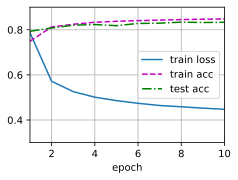

In [59]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

## 3.6.7 prediction

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


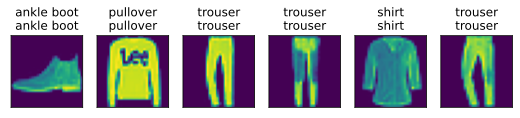

In [60]:
def predict_ch3(net, test_iter, n=6):  #@save
    """Predict labels (defined in Chapter 3)."""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

# 3.7 Concise Implementation of Softmax Regression

In [61]:
import torch
from torch import nn
from d2l import torch as d2l

In [62]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.utils.data.loader에 상속된 DataLoader를 이용해 train_iter 와 test_iter를 배치 사이즈를 기준으로 만들어 내는 과정이라고 볼 수 있다.

In [63]:
print(type(train_iter))

<class 'torch.utils.data.dataloader.DataLoader'>


## 3.7.1 initializing Model parameters

In [64]:
net = nn.Sequential(nn.Flatten(),nn.Linear(784,10))

In [65]:
def init_weights(m):
    print(type(m))
    print('!!!!!!')
    print(nn.Linear)
    if type(m) == nn.Linear:
        print(m.weight.shape)
        nn.init.normal_(m.weight,std = 0.01)

net.apply(init_weights)

<class 'torch.nn.modules.flatten.Flatten'>
!!!!!!
<class 'torch.nn.modules.linear.Linear'>
<class 'torch.nn.modules.linear.Linear'>
!!!!!!
<class 'torch.nn.modules.linear.Linear'>
torch.Size([10, 784])
<class 'torch.nn.modules.container.Sequential'>
!!!!!!
<class 'torch.nn.modules.linear.Linear'>


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

직접 함수 안에 있는 결과를 출력해보니 if(type(m))이란 것은 model 즉 net의 타입을 보고 그 타입이 input 784를 가지고 10개의 아웃풋을 가지는 layer를 발견한다면 그것의 가중치를 정규분포의 표준편차 0.01로 되어 있는곳에서 가져온 값으로 채웁니다. 

## 3.7.2 Softmax Implementation Revisited

In [66]:
loss = nn.CrossEntropyLoss()

pytorch에서 제공해주는 loss Cross Entropy loss를 사용하였다.

In [67]:
print(net.parameters)
print(net.parameters(1))
print(net[1].weight.data.shape)
print(net[1].bias.data.shape)

<bound method Module.parameters of Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)>
<generator object Module.parameters at 0x7f3c989baed0>
torch.Size([10, 784])
torch.Size([10])


## 3.7.3 Optimization Algorithm

In [68]:
trainer = torch.optim.SGD(net.parameters(),lr=0.1)

여기서는 torch에서도 제공하고 concise Implementation linear regression에서 사용했던 stochastic gradient descent를 learning rate 0.3으로 설정했다.

## 3.7.4  Training

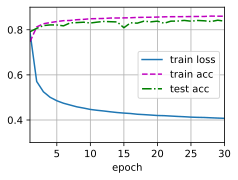

In [69]:
num_epochs = 30
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

nn.Sequential 을 설정했던 net 
dataloader 를 이용해서 만들어냈던 train_iter,test_iter
torch 의 cross Entropy를 이용해 만들어 낸 loss
1번의 전체학습을 10번 반복하겠다고 설정한 num_ephochs
stochastic gradient descent 를 이용해 가중치를 업데이트할 trainner를 train함수에 넣어 줌으로써 학습을 완성한것을 확인 할 수 있다.  

## 3.7.5 Prediction (간단하게 한줄도 실행시켰음) 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


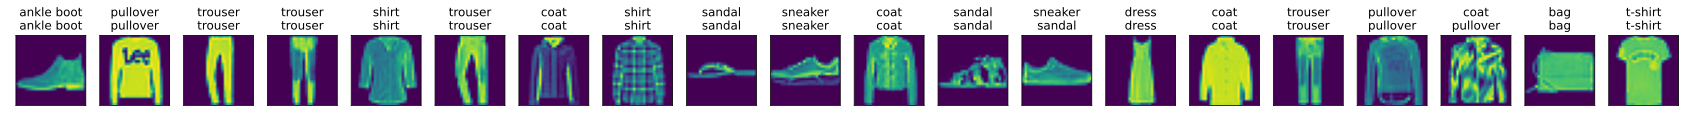

In [70]:
d2l.predict_ch3(net,test_iter,n=20)

다음은 epoch를 총 40번을 돌린 결과이다 확실이 모델의 정확도가 올라갔지만 어느 순간더이상 올라가지 않는 것을 확인 할 수 있다.